## Task 1.1

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp




k = 1.3 * 10 ** (-5)
m = 13.6 * 10 ** (-3)
v_0 = 870
g = 9.81
a  = sp.Symbol('a')
t = sp.Symbol('t')
L = 1500

sol = sp.solve([sp.Eq(L, v_0 * sp.cos(a) * t),
       sp.Eq(0, -g * t ** 2 / 2 + v_0 * sp.sin(a) * t)])

print(sol)

[{t: -1.72421940096865, a: -3.13187147040863}, {t: -177.361649788719, a: -1.58051750997606}, {t: 1.72421940096865, a: 0.00972118318116229}, {t: 177.361649788719, a: 1.56107514361373}]


Only answers with positive values of t satisfy initial conditions. Therefore, a = 0.00972118318116229 or a = 1.56107514361373.


## Task 1.2
Let's find maximal heights of cargo corresponding to these angles

In [22]:
a_1 = 0.00972118318116229
a_2 = 1.56107514361373
t_max_1 = v_0 * np.sin(a_1) / g
t_max_2 = v_0 * np.sin(a_2) / g
y_max_1 = -g * t_max_1 ** 2 / 2 + v_0 * np.sin(a_1) * t_max_1
y_max_2 = -g * t_max_2 ** 2 / 2 + v_0 * np.sin(a_2) * t_max_2
print(y_max_1, y_max_2)

3.645558530457284 38574.33609284569


Thus, maximal height is 38574.33609284569 m, which is corresponded to the angle a = 1.56107514361373

## Task 1.3

0.9360689412100808


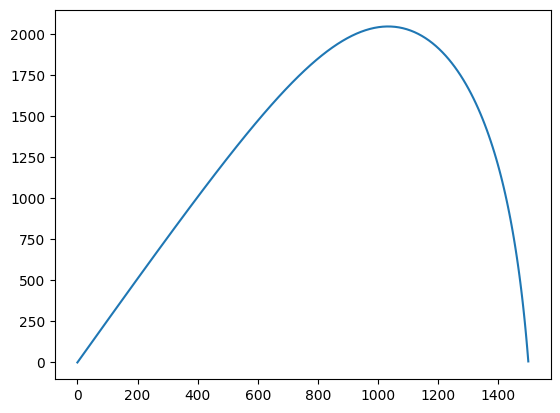

In [23]:
import matplotlib.pyplot as plt
import numpy as np


v_0 = 870
g = 9.81
angle = np.linspace(0, np.pi / 2, 5000)
time = np.linspace(0, 4000, 10000)
L = 1500

def hit_ground(t, y): return y[1]
hit_ground.terminal = True
hit_ground.direction = -1
from scipy.integrate import solve_ivp
def rhs(s, v):
    return [v[2], v[3], -k * v[2] * np.sqrt(v[2]** 2 + v[3] ** 2) / m, -g - k*v[3]*np.sqrt(v[2]** 2 + v[3] ** 2) / m]
res = [solve_ivp(rhs, t_span=(0, 4000), t_eval=time,
                 y0=[0, 0, v_0 * np.cos(a), v_0 * np.sin(a)],
                 events=hit_ground) for a in angle]


closest_val = res[0].y_events[0][0]
best_res = res[0]
alpha = 0
index = 0
j = 0
def distance(x, y):
    return (x - L) ** 2 + y ** 2
for r in res:
    for ev in r.y_events:
        if len(ev) != 0 and \
                distance(closest_val[0], closest_val[1]) \
                > distance(ev[0][0], ev[0][1]):
            closest_val = ev[0]
            best_res = r


print(np.arctan(best_res.y[0][3] / best_res.y[0][2]))

plt.plot(best_res.y[0], best_res.y[1])
plt.savefig('task1.png')
plt.show()

## Task 2

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle, Rectangle
from numpy import pi, e

In [25]:
# Given constants
R = 0.5
m = 0.02
g = 9.81
t = np.linspace(0, 0.3889, 100)
omega = -pi

In [26]:
#Functions obtained
phi = omega * t
OM = -0.312152 * e ** (-pi * t) + 0.312152 * e ** (pi * t)  - 0.49698 * np.sin(pi * t)
V_x = 0.980654 * e ** (-pi * t) + 0.980654 * e ** (pi * t) - 1.56131 * np.cos(pi * t)
F_cor = m * V_x * omega
F_gr = m * g + (t * 0)
F_c = m * omega ** 2 * OM
F_res = F_c - F_gr * np.sin(phi)
N = F_cor + F_gr *np.cos(phi)

In [27]:
# Constant points
O = np.array([0, 0])

# Points of interest
M = [OM * np.cos(phi), OM * np.sin(phi)]

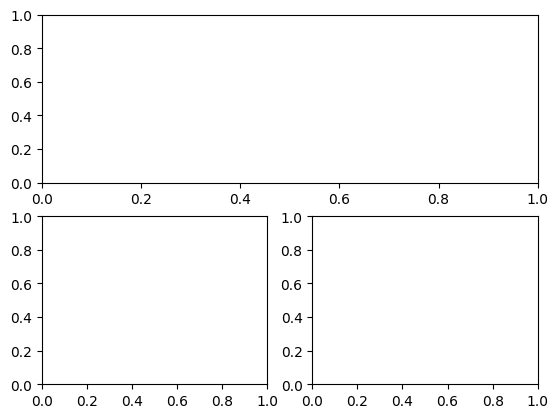

In [28]:
fig = plt.figure()
ax = [plt.subplot(211), plt.subplot(223), plt.subplot(224)]

In [29]:
def animate_func(num):
    for a in ax:
        a.clear()
    ax[0].add_artist(Circle((O[0], O[1]), R, fill=False))
    ax[0].add_artist(Rectangle((O[0] - R, O[1] - R / 20), 2 * R, R / 10, angle=phi[num] / pi * 180, rotation_point='center', fill=False))
    ax[0].plot(M[0][num], M[1][num],  marker="o", markersize=3, markeredgecolor="black")
    ax[0].set_xlim(-0.5, 0.5)
    ax[0].set_ylim(-0.5, 0.5)
    ax[0].set_aspect('equal')
    ax[0].quiver([M[0][num]], [M[1][num]], [0], [-1 * F_gr[num]], scale=0.5, scale_units='xy', width=0.009,
                 label='Gravitational force', color='Green')
    ax[0].quiver([M[0][num]], [M[1][num]], [np.cos(phi[num]) * F_c[num]], [np.sin(phi[num])* F_c[num]], scale=0.5,
                 scale_units='xy', width=0.009, label='Centrifugal force', color='red')
    ax[0].quiver([M[0][num]], [M[1][num]], [F_cor[num] * np.sin(phi[num])], [F_cor[num] * -np.cos(phi[num])],
                 scale=0.5, scale_units='xy', width=0.009, label='Coriolis force', color='blue')
    ax[0].quiver([M[0][num]], [M[1][num]], [N[num] * -np.sin(phi[num])], [N[num] * np.cos(phi[num])],
                 scale=0.5, scale_units='xy', width=0.009, label='Normal force', color='orange')
    ax[0].legend(fontsize='small')
    ax[1].set_title('x(t), N(t)')
    ax[1].set_xlim(0, 0.4)
    ax[1].set_ylim(-0.3, 0.5)
    ax[1].plot(t[:num], OM[:num], label='$x(t)$')
    ax[1].plot(t[:num], N[:num], label='$N(t)$')
    ax[1].legend()
    ax[2].set_title('Forces')
    ax[2].plot(t[:num], abs(F_cor[:num]), label='Coriolis force')
    ax[2].plot(t[:num], N[:num], label='Normal force')
    ax[2].plot(t[:num], F_gr[:num], label='Gravitational force')
    ax[2].plot(t[:num], F_c[:num], label='Centrifugal force')
    ax[2].plot(t[:num], F_res[:num], label='Resultant force')
    ax[2].legend()
    ax[2].set_xlim(0, 0.4)
    ax[2].set_ylim(0, 0.5)

In [30]:
line_ani = FuncAnimation(fig, animate_func, frames=len(t))
writergif = animation.PillowWriter(fps=60)
line_ani.save("task2.gif", dpi=300, writer=writergif)
plt.show()
plt.close('all')

C:\Users\Глебасс\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\quiver.py:616: RuntimeWarning: invalid value encountered in divide
  lengths = np.hypot(*dxy.T) / eps
